En este Notebook  vamos a explorar un poco los conceptos de aleatoreidad y probabilidad en Python

# Importamos lo necesario

In [1]:
import numpy as np
from math import sqrt
from matplotlib import pylab as plt

# Aleatoriedad

La aleatoredidad es un concepto central de la teoría de probabilidad. En general, la aleatoredidad viene asociada con la incetidumbre, que puede surgir por los errores de los datos o por los tamaños finitos de las muestras.

En la computadora, la aleatoreidad se simula usando como base un generador de números pseudo aleatorios (GNPA). Un GNPA genera una serie de números cuyas propiedades son similares a las de una serie de números aleatorios.

En python muchas de las funciones relacionadas están implementadas en el módulo random, pero una implementación más práctica aparece en el paquete numpy

In [2]:
from numpy import random

Podemos generar un numero al azar entre 0 y 1 facilmente

In [9]:
random.rand()

0.39926454226594665

Si corren la celda de arriba muchas veces, el resultado obtenido es diferente, pero siempre un número entre 0 y 1. Pero en realidad, los GNPA utilizan algoritmos, cuyas propiedades estás perfectamente definidas por el valor inicial (la semilla, o <em>seed</em>). Por lo tanto, no son realmente aleatorios.

In [11]:
random.seed(1234)
print(random.rand())
print(random.rand())
random.seed(1234)
print(random.rand())
print(random.rand())

0.1915194503788923
0.6221087710398319
0.1915194503788923
0.6221087710398319


Una característica práctica de la implementación en <tt>numpy</tt> es que se puede generar <tt>arrays</tt> de números aleatorios, pasándole el tamaño en cada dimensión. Esto puede ahorrarnos bastante tiempo

In [12]:
random.seed(1234)
print('Un array de 5x1')
print(random.rand(5,))
print('Un array de 3x2')
print(random.rand(3,2))

Un array de 5x1
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]
Un array de 3x2
[[0.27259261 0.27646426]
 [0.80187218 0.95813935]
 [0.87593263 0.35781727]]


Y por supuesto, si vuelvo a la misma semilla, los resultado son idénticos.

In [13]:
random.seed(1234)
print('Un array de 5x1')
print(random.rand(5,))
print('Un array de 3x2')
print(random.rand(3,2))

Un array de 5x1
[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]
Un array de 3x2
[[0.27259261 0.27646426]
 [0.80187218 0.95813935]
 [0.87593263 0.35781727]]


Como se puede ver arriba, para una semilla dada, la serie de números generada es idéntica. En la actualidad, fijar el <em>seed</em> de la manera que aparece arriba se considera mala práctica, y la sugerencia es hacer lo siguiente:

In [16]:
from numpy.random import RandomState, SeedSequence
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))
# Later, you want to restart the stream
rs = RandomState(random.MT19937(SeedSequence(1234)))
print(rs.rand(5,))

[0.12038356 0.40370142 0.87770263 0.9565788  0.42646002]
[0.12038356 0.40370142 0.87770263 0.9565788  0.42646002]


De esta manera, se puede tener generadores independientes, inicializados de manera diferente, cosa que no podía hacerse antes.


# Probabilidad

Pero... que significa que `numpy.random.rand()` genere numeros al azar entre [0, 1)?

La variable aleatoria $x$ sigue una distribucion **uniforme** en [0.0, 1.0).

Podemos caracterizar una distribucion uniforme en [a,b) definiendo su densidad de probabilidad como:

$p(x)=\frac{1}{b-a}$ si $a \leq x < b$

$p(x)=0$ si $a > x$ o $ b \leq x$


Como comprobamos que $x$ sigue una distribuccion uniforme?

Bueno, podemos generar N tiradas y aprovechar que tenemos N variables independientes identicamente distribuidas para obtener los momentos de $x$. Si los momentos son los de la distribucion uniforme, gane.

Calculemos para N = 10 la media y la desviacion estandar de $x$, puede hacerlo a mano o utilizando `np.mean` y `np.std` y comparen con los resultados esperados sabiendo que

$\mu = \int p(x)x dx = \int_{a}^{b}\frac{x}{b-a}dx=\frac{b^{2}-a^{2}}{2(b-a)}=\frac{b+a}{2}$

$\sigma^{2}=\int p(x)(x-\mu)^{2}dx = \frac{1}{b-a}\int_{a}^{b}(x-\frac{a+b}{2})^{2}dx = \frac{1}{b-a}\int_{-(b-a)/2}^{(b-a)/2}u^{2}du=\frac{(b-a)^{2}}{12}$


Notese que estamos haciendo la aproximacion

$\mu \approx \frac{1}{N}\sum_{n=1}^{N}x_{n}$

$\sigma^{2} \approx \frac{1}{N}\sum_{n=1}^{N}(x_{n}-\mu)^{2}$


### Ejercicio

In [18]:
N=10
a=0.0
b=1.0
media_esperada=(a+b)*0.5
desviacion_estandar_esperada=(b-a)/np.sqrt(12)
print(media_esperada,desviacion_estandar_esperada)

experimentos=random.rand(N)
print(np.mean(experimentos),np.std(experimentos,ddof=1))

0.5 0.2886751345948129
0.5584114556310609 0.26989814660647343


### Seguimos

Que esta pasando?

En efecto,  los estimadores no dan exactamente lo que esperamos. Como mejorar esto?

Probemos con N = 10000

In [19]:
N=10000
experimentos=random.rand(N)
print(np.mean(experimentos),np.std(experimentos))

0.49981895062367904 0.289879930634129


Mucho mas cerca...

Ahora, grafiquen la media y la desviacion estandar en funcion de N, para de N = 10, 100, 1000, 10000, 100000, 1000000

### Otro ejercicio

In [23]:
N=1000000
experimentos=random.rand(N)
medias=[]
desviaciones=[]
for m in [10,100,1000,10000,100000,1000000]:
  medias.append(np.mean(experimentos[:m]))
  desviaciones.append(np.std(experimentos[:m]))

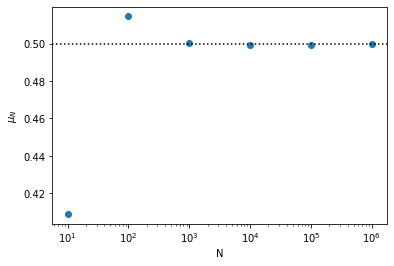

Text(0, 0.5, '$\\sigma_{N}$')

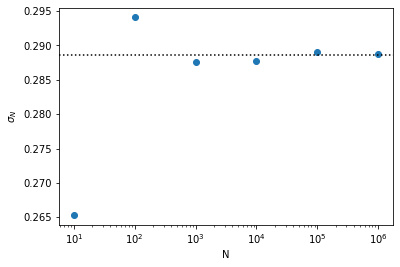

In [24]:
plt.scatter([10,100,1000,10000,100000,1000000],medias)
plt.axhline(media_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\mu_{N}$')
plt.show()

plt.scatter([10,100,1000,10000,100000,1000000],desviaciones)
plt.axhline(desviacion_estandar_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\sigma_{N}$')


### Seguimos

Ademas de comparar momentos, podemos visualizar las mediciones. Una opcion es usar un box plot, donde se muestran los cuantiles de los datos

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


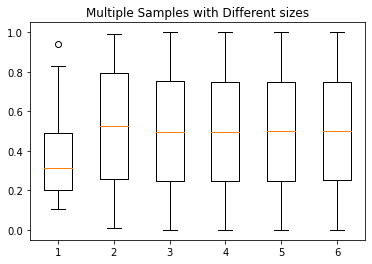

In [25]:
from matplotlib.pyplot import boxplot

data = [experimentos[:m] for m in [10,100,1000,10000,100000,1000000]]
fig, ax = plt.subplots()
ax.set_title('Multiple Samples with Different sizes')
ax.boxplot(data)
fig.show()

La opcion que vamos a preferir en la materia es utilizar histogramas.

Los histogramas separan el rango de variable aleatoria en M bines. Luego, cuentan cuantos eventos caen en cada bin. Al hacer los histogramas, suele ser mas seguro definir los bines de antemano. Por ejemplo, con `np.linspace` o `np.arange`.


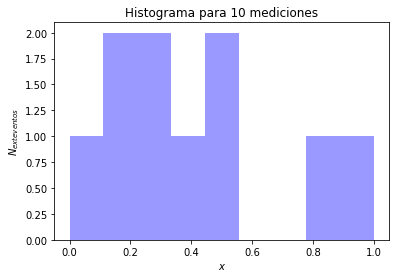

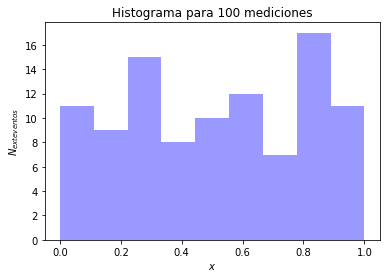

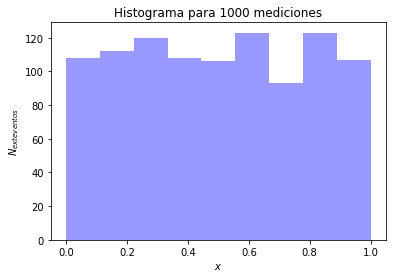

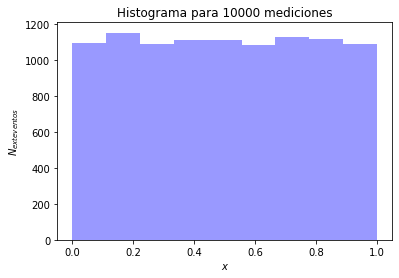

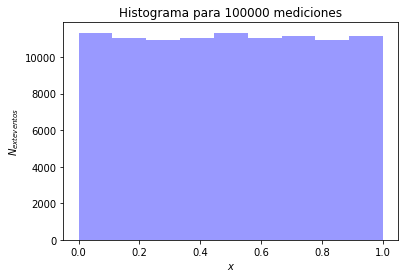

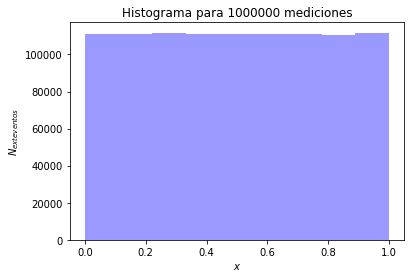

In [26]:
bins=np.linspace(0.0,1.0,10)
for dato in data:
  plt.hist(dato,bins=bins,color='blue',alpha=0.4)
  plt.xlabel('$x$')
  plt.ylabel('$N_{\text{eventos}}$')
  plt.title('Histograma para '+str(len(dato))+' mediciones')
  plt.show()

Podemos normalizar los histogramas para que la suma de todos los conteos de 1. Una ventaja de esto es que podemos comparar con la distribucion de probabilidad.

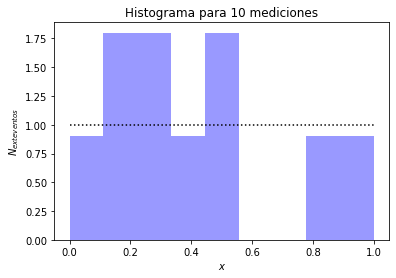

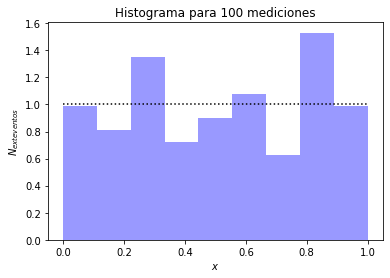

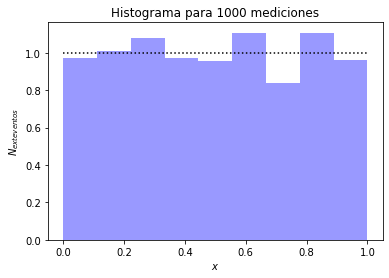

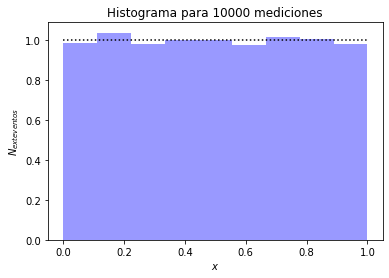

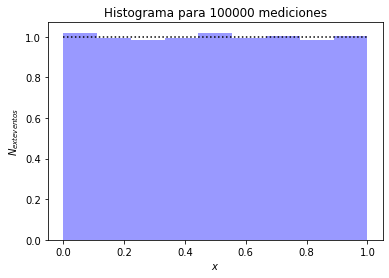

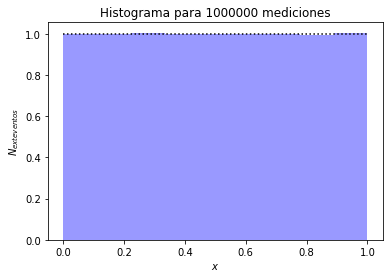

In [27]:
bins=np.linspace(0.0,1.0,10)
for dato in data:
  plt.hist(dato,bins=bins,color='blue',alpha=0.4,density='True')
  plt.plot(bins,[(1.0/(b-a)) for i in range(len(bins))], color='black', linestyle='dotted')
  plt.xlabel('$x$')
  plt.ylabel('$N_{\text{eventos}}$')
  plt.title('Histograma para '+str(len(dato))+' mediciones')
  plt.show()

Noten que p(x)>1.0 para algunos bines. Esto no es errado por que estamos con una pdf, no una pmf, aunque los bines sean discretos. Otra diferencia entre pdf y pmf es que, si sumamos:

9.0


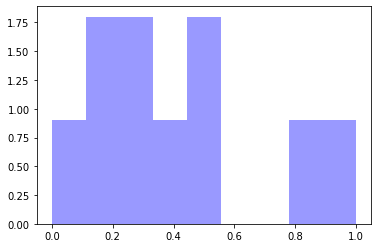

In [28]:
binned_data, hist_bins, pp = plt.hist(data[0],bins=bins,color='blue',alpha=0.4,density='True')
print(np.sum(binned_data))

In [33]:
np.sum(len(data[0])*binned_data*(hist_bins[1]-hist_bins[0]))

9.999999999999998

No da 1! Eso es porque falto incluir el bineado

In [29]:
np.sum(binned_data*(hist_bins[1]-hist_bins[0]))

0.9999999999999999

Esto no sucede para variables discretas, es una consecuencia de discretizar una variable continua y aproximar

$\int f(x)p(x)dx \approx \sum_{i=1}^{M}f(x_{i})p(x_{i})\Delta_{i}$

## Otras distribuciones

En la vida, y casi siempre, las variables  no siguen distribuciones uniformes. Como bien ejemplifico Rodrigo en clase, tenemos otras distribuciones tipicas. Por suerte, la gran mayoria de ellas estan implementadas en `scipy.stats`

In [34]:
from scipy.stats import norm, beta, bernoulli, binom, multinomial,multivariate_normal, poisson, gamma #etc

Para variar un poco vayamos a alguna variable aleatoria discreta. Por ejemplo, la cantidad $k$ de veces que una moneda cargada con probabilidad $p$ sale cara (1) si la tiramos $N$ veces. Cada tirada sigue una distribucion de Bernoulli pero tambien podemos considerar la Binomial con $k$ exitos en $N$ tiradas, dado que son equivalentes.

Los parametros de la distribucion que sigue la variable aleatoria $k$ son $N$ y $p$. Entonces, podemos definir una distribucion especifica como

In [35]:
N=10
p=0.6
mi_binomial=binom(p=p,n=N)

$k$ puede tomar valores 0, 1, 2, ... ,10.

In [36]:
k_values=np.arange(0,11,1)
print(k_values)

[ 0  1  2  3  4  5  6  7  8  9 10]


Podemos ver la probabilidad de cada $k$ utilizando el metodo `pmf`

In [37]:
for k in k_values:
  print(k,mi_binomial.pmf(k))

0 0.00010485760000000014
1 0.0015728640000000028
2 0.010616832
3 0.04246732800000004
4 0.11147673600000013
5 0.20065812480000034
6 0.2508226560000002
7 0.21499084800000012
8 0.12093235199999994
9 0.04031078400000004
10 0.0060466176


Obviamente, es mas lindo graficarlo. Gracias a numpy, todo se lee intuitivamente

Text(0, 0.5, 'Binom(k|N,p)')

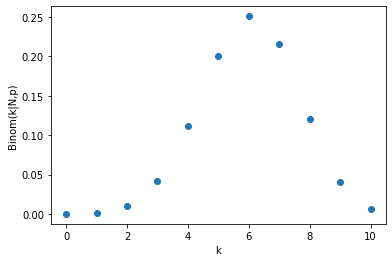

In [38]:
k_probs=mi_binomial.pmf(k_values)
plt.scatter(k_values,k_probs)
plt.xlabel('k')
plt.ylabel('Binom(k|N,p)')

Comprobemos la normalizacion!

In [39]:
print(np.sum(k_probs))

1.0000000000000007


Podemos generar datos a partir de esta distribucion utilizando el metodo `rvs`. Que son estos datos?

In [40]:
Nexp=1000000
tiradas = mi_binomial.rvs(Nexp)

Repitamos lo que hicimos con la uniforme, calculemos los momentos sabiendo que

$\mu = \sum_{k=0}^{N}k\cdot p(k|N,p)=N\cdot p$

$\sigma^{2} = N\cdot p\cdot (1-p)$

Donde aca la sumatoria es exacta y no una aproximacion.

In [41]:
media_esperada=N*p
desviacion_estandar_esperada=np.sqrt(N*p*(1-p))
print(media_esperada,desviacion_estandar_esperada)

6.0 1.5491933384829668


### Ejercicio

In [42]:
medias=[]
desviaciones=[]
for m in [10,100,1000,10000,100000,1000000]:
  medias.append(np.mean(tiradas[:m]))
  desviaciones.append(np.std(tiradas[:m]))

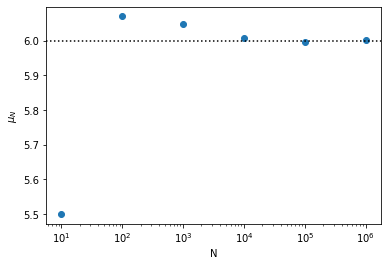

Text(0, 0.5, '$\\sigma_{N}$')

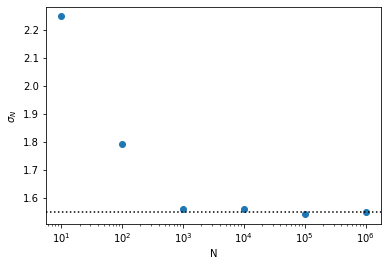

In [43]:
plt.scatter([10,100,1000,10000,100000,1000000],medias)
plt.axhline(media_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\mu_{N}$')
plt.show()

plt.scatter([10,100,1000,10000,100000,1000000],desviaciones)
plt.axhline(desviacion_estandar_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\sigma_{N}$')


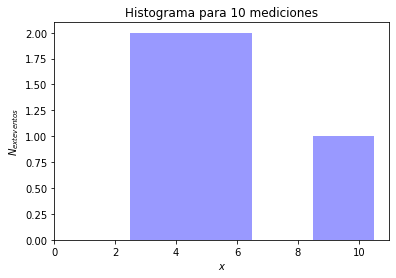

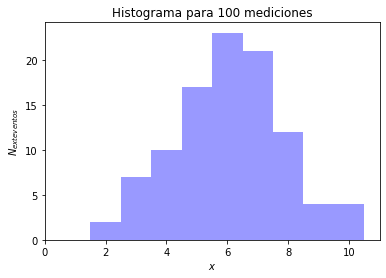

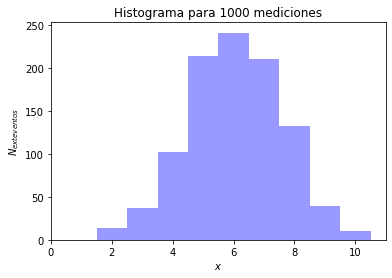

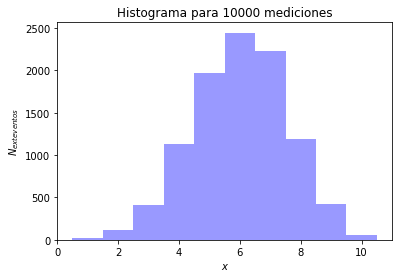

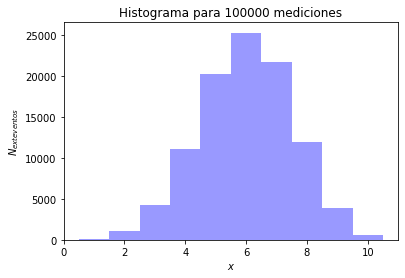

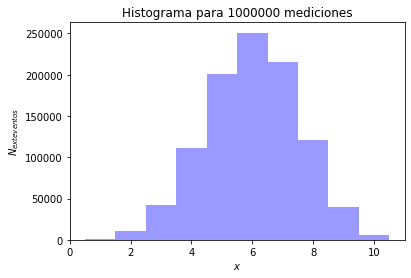

In [44]:
data = [tiradas[:m] for m in [10,100,1000,10000,100000,1000000]]
bins=np.arange(-0.5,11.5,1.0)
for dato in data:
  plt.hist(dato,bins=bins,color='blue',alpha=0.4)
  plt.xlim(0.0,11.0)
  plt.xlabel('$x$')
  plt.ylabel('$N_{\text{eventos}}$')
  plt.title('Histograma para '+str(len(dato))+' mediciones')
  plt.show()

In [ ]:
bins

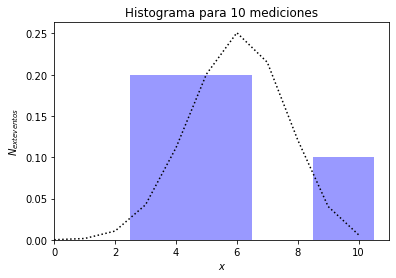

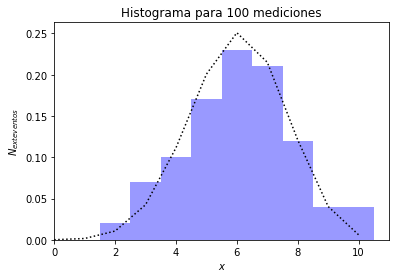

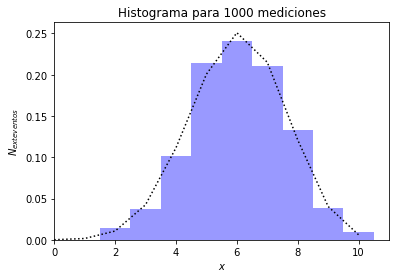

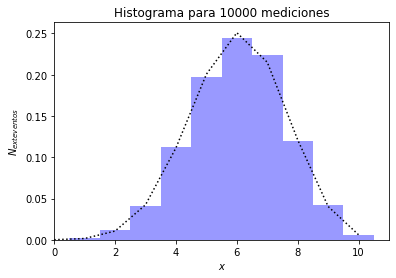

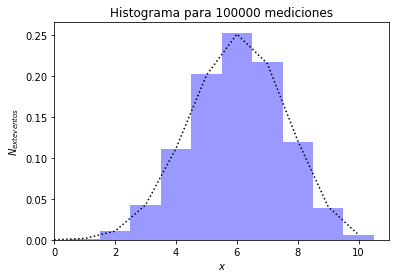

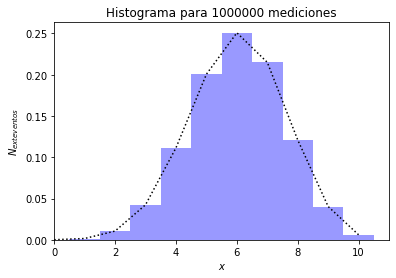

In [45]:
for dato in data:
  plt.hist(dato,bins=bins,color='blue',alpha=0.4,density='True')
  plt.plot(np.arange(0,11,1),mi_binomial.pmf(np.arange(0,11,1)), color='black', linestyle='dotted')
  plt.xlabel('$x$')
  plt.xlim(0.0,11.0)
  plt.ylabel('$N_{\text{eventos}}$')
  plt.title('Histograma para '+str(len(dato))+' mediciones')
  plt.show()

### Seguimos

Vamos con la Gaussiana, o distribucion Normal, $\mathcal{N}(x|\mu,\sigma^{2})$

In [47]:
mu=15.0
sigma=2.0
mi_gaussiana=norm(loc=mu,scale=sigma)

Si queremos graficar la pdf de la gaussiana, podemos usar el metodo `pdf`

Text(0, 0.5, '$\\mathcal{N}(x|\\mu,\\sigma^{2})$')

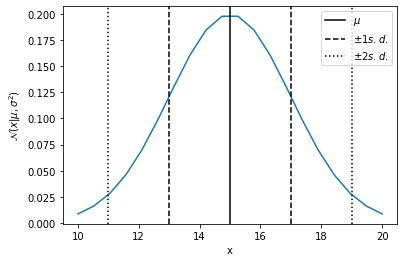

In [48]:
# valores posibles
x = np.linspace(10.0,20.0,20)
plt.plot(x,mi_gaussiana.pdf(x))
plt.axvline(mu,color='black',linestyle='solid',label='$\mu$')
plt.axvline(mu-sigma,color='black',linestyle='dashed',label='$\pm 1 s.d.$')
plt.axvline(mu+sigma,color='black',linestyle='dashed')
plt.axvline(mu-2.0*sigma,color='black',linestyle='dotted',label='$\pm 2 s.d.$')
plt.axvline(mu+2.0*sigma,color='black',linestyle='dotted')
plt.xlabel('x')
plt.legend(loc='upper right')
plt.ylabel('$\mathcal{N}(x|\mu,\sigma^{2})$')

Si queremos generar datos a partir de la gaussiana, nuevamente tenemos el metodo `rvs`

In [49]:
Nexp=1000000
mediciones=mi_gaussiana.rvs(Nexp)

Y podemos hacer lo mismo que antes

## Teorema Central del Limite

Con lo que vimos ya podemos ejemplificar un poco el teorema central del limite.

Comparemos una Binomial con p=0.6 y N yendo a infinito con una Gaussiana. La Gaussiana tendra siempre media $N\cdot p$ y desviacion estandar $\sqrt{N\cdot p\cdot (1-p)}$

Noten que aca el limite no es el numero de experimentos sino en el numero de tiradas por experimento. Sin embargo, para tener datos representativos necesitamos muchos experimentos.

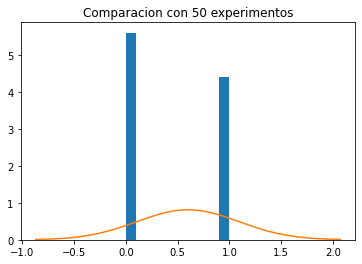

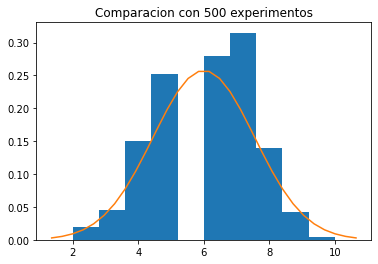

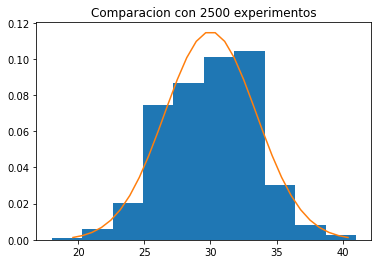

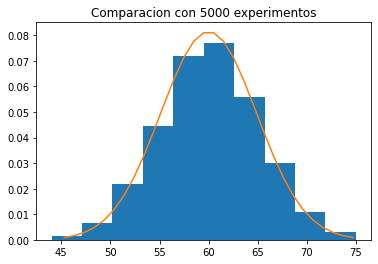

In [50]:
p = 0.6
N=[1,10,50,100]
for n in N:
  data=binom(p=p,n=n).rvs(50*n)
  a, b, c = plt.hist(data,density='True')
  mu=n*p
  sigma=np.sqrt(n*p*(1-p))
  x=np.linspace(mu-3*sigma,mu+3*sigma,30)
  plt.plot(x,norm(loc=mu,scale=sigma).pdf(x))
  plt.title('Comparacion con '+str(50*n)+' experimentos')
  plt.show()

## Graficos 2d

Hasta ahora solo vimos distribuciones unidimensionales. La distribucion bidimensional que mas nos interesa es, como no, una gaussiana.

Ahora tenemos $\vec{\mu}=(\mu_{1},\mu_{2})^{T}$ y $\Sigma$ una matriz de 2x2

In [ ]:
mu = [1.0, -1.0]
sigma=[[0.1,0.01],[0.01,0.1]]
mi_gaussiana_2d=multivariate_normal(mean=mu,cov=sigma)

Para graficar en 2d tenemos un par de opciones. Podemos generar datos y hacer un histograma 2d. Mientras mas dimensiones tiene un histograma, mas datos necesitamos para que sea representativo.

In [ ]:
datos=mi_gaussiana_2d.rvs(1000)

In [ ]:
datos.shape

Definir los bins puede ser feo... Jueguen un poco y compruebenlo por ustedes mismos

In [ ]:
plt.hist2d(datos[:,0],datos[:,1],bins=[10,10],cmap='plasma')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title(r'$\mathcal{N}(\vec{x}|\vec{\mu},\Sigma)$')
plt.colorbar()
plt.show()

Uno aca puede marginalizar sumando sobre alguna direccion

In [ ]:
h, xedges, yedges, image = plt.hist2d(datos[:,0],datos[:,1],bins=[10,10],cmap='plasma',density='True')

In [ ]:
x1d=np.sum(h,axis=1)*(yedges[1]-yedges[0])
x2d=np.sum(h,axis=0)*(xedges[1]-xedges[0])

In [ ]:
plt.plot([0.5*(xedges[i+1]+xedges[i]) for i in range(h.shape[0])],x1d)
plt.xlabel('$x_{1}$')
plt.show()
plt.plot([0.5*(yedges[i+1]+yedges[i]) for i in range(h.shape[1])],x2d)
plt.xlabel('$x_{2}$')
plt.show()

In [ ]:
np.sum(h)*(xedges[1]-xedges[0])*(yedges[1]-yedges[0])

Otra opcion  es utilizar el metodo 'pdf' y hacer un 'contourplot'

In [ ]:
x1=np.linspace(0.0,2.0,10)
x2=np.linspace(-2.0,0.0,5)
X1, X2 = np.meshgrid(x1,x2)

In [ ]:
print(X1.shape,X2.shape)

In [ ]:
pos=np.dstack((X1, X2))
print(pos.shape)
Z=mi_gaussiana_2d.pdf(pos)
print(Z.shape)

In [ ]:
plt.contourf(X1,X2,Z,cmap='gist_heat_r')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title(r'$\mathcal{N}(\vec{x}|\vec{\mu},\Sigma)$')
plt.colorbar()

Y podemos superponer ambos plots

In [ ]:
plt.hist2d(datos[:,0],datos[:,1],bins=[10,10],density='True',cmap='gist_heat_r')
plt.colorbar()
pdfplot=plt.contour(X1,X2,Z,colors='blue')
plt.clabel(pdfplot, inline=1, fontsize=10)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title(r'$\mathcal{N}(\vec{x}|\vec{\mu},\Sigma)$')
plt.show()

# Un lindo ejercicio si hay tiempo

Una enfermedad genética rara afecta al 0.1% de la población de un país. Para diagnosticarla, existe un análisis clínico que detecta la enfermedad en el 99% de los casos en los que el paciente la padece, y tiene un 1% de falsos positivos.

Un paciente recibe un resultado positivo del análisis clínico.

¿Qué probabilidad hay de que la persona padezca la enfermedad?